<a href="https://colab.research.google.com/github/orpatashnik/StyleCLIP/blob/main/StyleCLIP_global.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x
! pip install torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html
! pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git
! git clone https://github.com/orpatashnik/StyleCLIP

TensorFlow 1.x selected.
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |███████████████████████         | 834.1MB 1.2MB/s eta 0:04:32tcmalloc: large alloc 1147494400 bytes == 0x557378bf8000 @  0x7f4317163615 0x55733fa7706c 0x55733fb56eba 0x55733fa79e8d 0x55733fb6b99d 0x55733faedfe9 0x55733fae8b0e 0x55733fa7b77a 0x55733faede50 0x55733fae8b0e 0x55733fa7b77a 0x55733faea86a 0x55733fb6c7c6 0x55733fae9ee2 0x55733fb6c7c6 0x55733fae9ee2 0x55733fb6c7c6 0x55733fae9ee2 0x55733fb6c7c6 0x55733fbee431 0x55733fb4f049 0x55733fab9c84 0x55733fa7a8e9 0x55733faeeade 0x55733fa7b69a 0x55733fae9a45 0x55733fae8e0d 0x55733fa7b77a 0x55733fae9a45 0x55733fa7b69a 0x55733fae9a45
     |█████████████████████████████▏  | 1055.7MB 1.2MB/s eta 0:01:26tcmalloc: large alloc 1434370048 bytes == 0x5573bd24e000 @  0x7f4317163615 0x55733fa7706c 0x55733fb56eba 0x55733fa79e8d 0x55733fb6b99d 0x55733faedfe9 0x55733fae8b0e 0x55733fa7b77a 0x55733faede50 0x55733fae8b0e 0x55733fa7b77a 0x55733faea86a 0x5573

In [6]:
# input dataset name 
dataset_name='ffhq' # input dataset name, currently, only support ffhq

# input prepare data 
!python GetCode.py --dataset_name $dataset_name --code_type 'w'
!python GetCode.py --dataset_name $dataset_name --code_type 's'
!python GetCode.py --dataset_name $dataset_name --code_type 's_mean_std'

import tensorflow as tf
import numpy as np 
import torch
import clip
from PIL import Image
import pickle
import copy
import matplotlib.pyplot as plt
from MapTS import GetFs,GetBoundary,GetDt
from manipulate import Manipulator
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

M=Manipulator(dataset_name='ffhq')
fs3=np.load('./npy/ffhq/fs3.npy')
np.set_printoptions(suppress=True)

[Errno 2] No such file or directory: 'StyleCLIP/global'
/content/StyleCLIP/global


UsageError: Line magic function `%dataset_name` not found.


In [18]:
img_indexs=[1]
dlatent_tmp=[tmp[img_indexs] for tmp in M.dlatents]
M.num_images=len(img_indexs)

In [20]:
neutral='face with hair'
target='face with grey hair'
classnames=[target,neutral]
dt=GetDt(classnames,model)

0.3967


num of channels being manipulated: 10


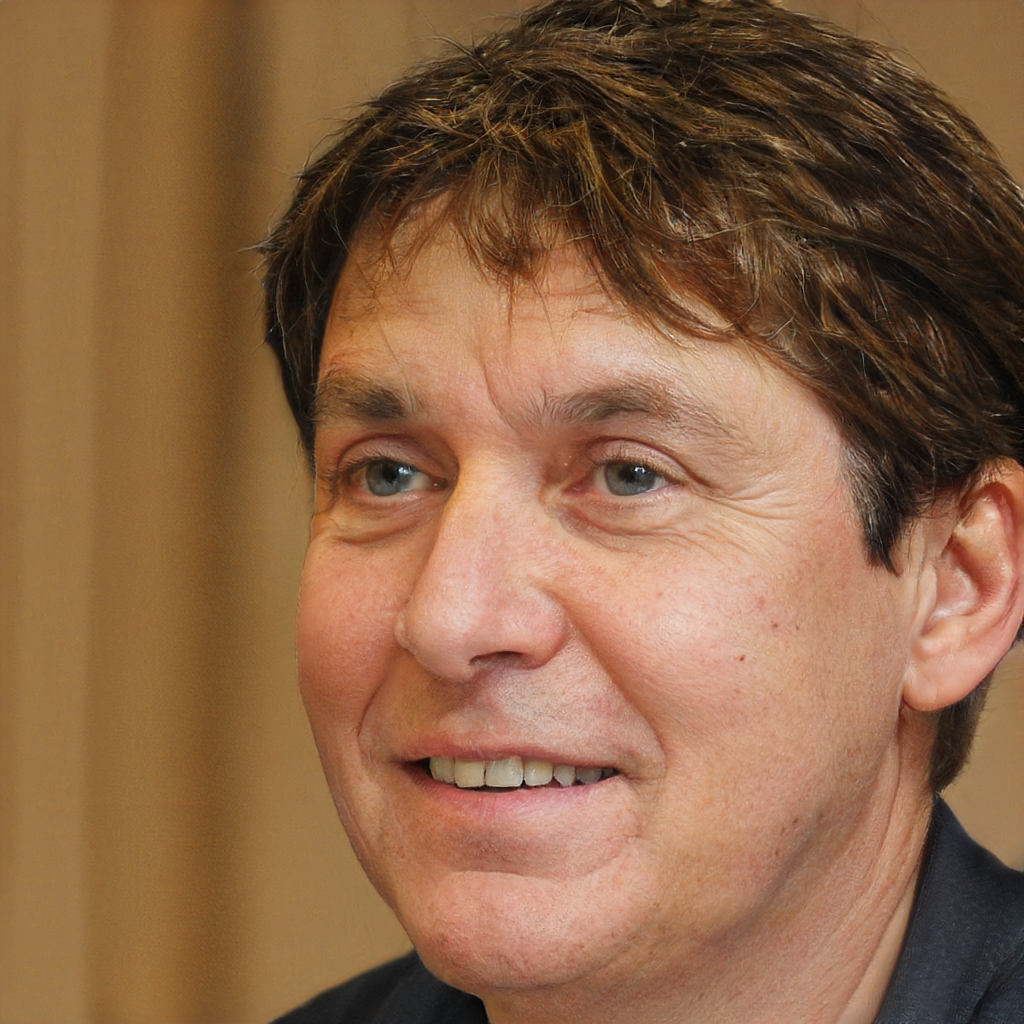

In [31]:
#beta=0.1
#alpha=1
beta = 0.16 #@param {type:"slider", min:0.08, max:0.3, step:0.01}
alpha = -8 #@param {type:"slider", min:-10, max:10, step:0.1}
M.alpha=[alpha]
boundary_tmp2,c=GetBoundary(fs3,dt,M,threshold=beta)
codes=M.MSCode(dlatent_tmp,boundary_tmp2)
out=M.GenerateImg(codes)
Image.fromarray(out[0,0])

2